In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv("C:/Users/Vaishakh Nambiar/Desktop/Bengaluru_House_Data.csv")

In [6]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [7]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
data.shape


(13320, 9)

In [9]:
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [10]:
data1=data.drop(['area_type','availability','society'],axis='columns')
data1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [11]:
data1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [12]:
data2=data1.dropna()

In [13]:
data2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [14]:
data2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [15]:
data2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [16]:
data2['bhk'] = data2['size'].apply(lambda x:int(x.split(' ')[0]))

C:\Users\Vaishakh Nambiar\AppData\Local\Temp\ipykernel_8304\1347500727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['bhk'] = data2['size'].apply(lambda x:int(x.split(' ')[0]))


In [17]:
data2.bhk.unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [18]:
data2[data2.bhk>10]

,location,size,total_sqft,bath,balcony,price,bhk
459,1 Giri Nagar,11 BHK,5000,9.0,3.0,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,0.0,170.0,11
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,3.0,150.0,11
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,0.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,2.0,300.0,12
9935,1Hoysalanagar,13 BHK,5425,13.0,0.0,275.0,13


In [19]:
data2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
data2.groupby('total_sqft')['total_sqft'].agg('count')

total_sqft
1.25Acres        1
1.26Acres        1
1000           170
1000 - 1285      1
10000            2
              ... 
995             10
996              4
997              2
998              1
999              3
Name: total_sqft, Length: 1976, dtype: int64

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
data2[~data2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [23]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [24]:
data3=data2.copy()
data3['total_sqft']=data3['total_sqft'].apply(convert_sqft_to_num)
data3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [25]:
data3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [26]:
data4=data3.copy()
data4['price_per_sqft']=data4['price']*100000/data4['total_sqft']
data4.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [27]:
len(data4.location.unique())

1265

In [28]:
data4.location = data4.location.apply(lambda x:x.strip())
location_stats = data4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

In [29]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [30]:
location_stats_less_than_10

location
1st Block Koramangala    10
Kalkere                  10
Basapura                 10
Kodigehalli              10
Gunjur Palya             10
                         ..
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1017, dtype: int64

In [31]:
data4.location = data4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(data4.location.unique())

238

In [32]:
data4.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [33]:
data4.head(10)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
10,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,3888.888889
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,3800.000000


In [34]:
data4[data4.total_sqft/data4.bhk<300]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268
...,...,...,...,...,...,...,...,...
13219,Laggere,7 Bedroom,1590.0,9.0,3.0,132.0,7,8301.886792
13221,other,9 Bedroom,1178.0,9.0,1.0,75.0,9,6366.723260
13281,Margondanahalli,5 Bedroom,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,3.0,70.0,5,9043.927649


In [35]:
data4.shape

(12710, 8)

In [36]:
data5 = data4[~(data4.total_sqft/data4.bhk<300)]
data5.shape

(12055, 8)

In [37]:
data5.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [38]:
#outlier removal from price_per_sqft
def remove_outliers(df):
    out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        sd=np.std(subdf.price_per_sqft)
        sort=subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft<(m+sd))]
        out=pd.concat([out,sort],ignore_index=True)
    return out

data6 = remove_outliers(data5)
data6.shape

(9848, 8)

In [39]:
data6.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


In [40]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

data7 = remove_bhk_outlier(data6)
data7.shape
    

(7025, 8)

Text(0.5, 1.0, 'number of properties in price per square feet')

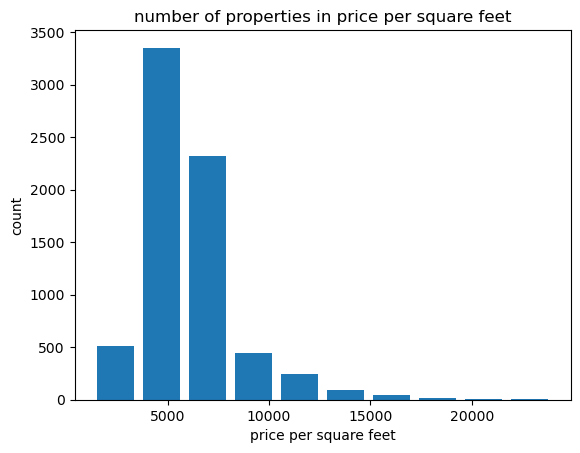

In [41]:

plt.hist(data7.price_per_sqft,rwidth = 0.8)
plt.xlabel("price per square feet")
plt.ylabel("count")
plt.title("number of properties in price per square feet")

In [42]:
data7.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


In [43]:
data7.bath.unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

In [44]:
data7.shape

(7025, 8)

In [45]:
data7[data7.bath>=data7.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
33,2nd Stage Nagarbhavi,6 Bedroom,3000.0,8.0,3.0,451.0,6,15033.333333
34,2nd Stage Nagarbhavi,6 Bedroom,2400.0,8.0,3.0,450.0,6,18750.000000
506,Arekere,4 BHK,2710.0,6.0,2.0,142.0,4,5239.852399
553,BTM 2nd Stage,3 Bedroom,1260.0,5.0,1.0,185.0,3,14682.539683
785,Bannerghatta,4 BHK,3012.0,6.0,2.0,250.0,4,8300.132802
...,...,...,...,...,...,...,...,...
9538,other,4 BHK,6652.0,6.0,1.0,510.0,4,7666.867108
9655,other,2 BHK,600.0,4.0,1.0,70.0,2,11666.666667
9704,other,3 Bedroom,5656.0,5.0,0.0,499.0,3,8822.489392
9811,other,4 BHK,6652.0,6.0,1.0,660.0,4,9921.828022


In [46]:
data8 = data7[~(data7.bath>=data7.bhk+2)]

In [47]:
data8.shape

(6958, 8)

In [48]:
7025-67

6958

In [49]:
data9 = data8.drop(['size','price_per_sqft'],axis='columns')
data9.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [50]:
pd.get_dummies(data9.location)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9838,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9840,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9841,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9844,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [51]:
dummies = pd.get_dummies(data9.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
data10 = pd.concat([data9,dummies.drop('other',axis='columns')],axis='columns')
data10.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
data11 = data10.drop('location',axis='columns')
data11.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,2.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,0.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
data11.shape

(6958, 242)

In [55]:
x=data11.drop('price',axis='columns')
x.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,2.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,0.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
y=data11.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [58]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8584587986234888

In [59]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.8773143 , 0.84355571, 0.78319592, 0.89718661, 0.8720526 ])

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def find_best_model_using_gridsearchcv(x,y):
    algos = {
         'linear_regression': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())
            ]),
            'params': {
                'regressor__fit_intercept': [True, False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
        'model' : algo_name,
        'best_score' : gs.best_score_,
        'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(x,y)

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "D:\anaconda\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "D:\anaconda\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  Fi

,model,best_score,best_params
0,linear_regression,0.854661,{'regressor__fit_intercept': True}
1,lasso,0.697321,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.747845,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [68]:
x.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=241)

In [86]:
def predict_price(location, sqft, bath, bhk, balcony, df11, lr_clf):
    # Define x from the DataFrame without the target column 'price'
    x = df11.drop('price', axis=1)
    
    try:
        # Find the index of the location column
        loc_index = np.where(x.columns == location)[0][0]
    except IndexError:
        # Handle the case where location is not found
        loc_index = -1

    # Create an array of zeros with the same length as the number of columns
    x_pred = np.zeros(len(x.columns))
    x_pred[0] = sqft
    x_pred[1] = bath
    x_pred[2] = bhk
    x_pred[3] = balcony
    if loc_index >= 0:
        x_pred[loc_index] = 1

    # Predict the price using the trained model
    return lr_clf.predict([x_pred])[0]

# Example of how to call the function
# Assuming 'df12' is your DataFrame and 'lr_clf' is your trained model
# Replace '1st Phase JP Nagar', 2000, 3, 4, 2 with actual values
predict_price('Yelahanka New Town', 2000, 4, 10, 2, data11, lr_clf)

D:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


138.29292297323775